<a href="https://colab.research.google.com/github/followviny/Data-analysis/blob/main/practice2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

## Задание 1 (рейтинги президентов)

В таблице `presidents.csv` представлены рейтинги различных президентов США . Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [3]:
df = pd.melt(df, id_vars=['year'], value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
                  var_name='quarter', value_name='rating')

df = df.dropna()

quarter_mapping = {'Qtr1': 1, 'Qtr2': 2, 'Qtr3': 3, 'Qtr4': 4}
df['quarter'] = df['quarter'].map(quarter_mapping)

x = df[(df['year'] == 1969) & (df['quarter'] >= 1) |
            (df['year'] == 1970) |
            (df['year'] == 1971) |
            (df['year'] == 1972) & (df['quarter'] <= 2)]['rating']

y = df[(df['year'] == 1972) & (df['quarter'] >= 3) |
            (df['year'] == 1973) |
            (df['year'] == 1974) & (df['quarter'] <= 2)]['rating']

x = x.values
y = y.values

print(x)
print(y)


[59. 66. 51. 49. 65. 53. 48. 61. 65. 61. 54. 56. 52. 49.]
[68. 28. 44. 25. 40. 27.]


In [4]:
print(x.mean())
print(y.mean())

56.357142857142854
38.666666666666664


Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

**Гипотеза**: \\
Нулевая гипотеза (H0): Средний рейтинг Никсона до скандала равен среднему рейтингу после скандала. \\
Альтернативная гипотеза (H1): Средний рейтинг Никсона после скандала ниже среднего рейтинга до скандала. \\
Данные имеют нормальное распределение, и число наблюдений мало, наша задача - сравнить средние значения рейтингов до и после определенной даты, дисперсия одинаковая -> будем использовать **односторонний(тк предполагаем что после скандала он упал) t-тест Стьюдента для проверки гипотезы о равенстве средних.**

In [5]:
obs, pval = sts.ttest_ind(x, y, equal_var=True, alternative='greater')

print(f"Observed value: {obs}")
print(f"P-value: {pval}")

alpha = 0.05
if pval < alpha:
    print("Отвергаем нулевую гипотезу: Средний рейтинг Никсона снизился после Уотергейтского скандала.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу: нет значимого различия в среднем рейтинге Никсона до и после скандала.")


Observed value: 3.5640741313229793
P-value: 0.0011087344846424454
Отвергаем нулевую гипотезу: Средний рейтинг Никсона снизился после Уотергейтского скандала.


In [6]:
# небольшая самопроверка
assert np.abs(obs - 3.5640741313229793) < 1e-5

**Выводы**:
Так как p-значение меньше уровня значимости, мы отвергаем нулевую гипотезу. Используя $5\%$ уровень значимости мы выяснили, что есть статистически значимые доказательства того, что средний рейтинг Никсона снизился после Уотергейтского скандала. \\
Мы можем заключить, что Уотергейтский скандал оказал негативное влияние на рейтинг одобрения президента Ричарда Никсона. Средний рейтинг значительно снизился после скандала, что подтверждается статистически значимыми результатами t-теста.

Снова президентом Никсон станет в $3000$ году.

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## Задание 2 (доктор сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют, сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/sleep.csv')
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение.

**Гипотеза:** \\
Нулевая гипотеза (H0): Среднее отклонение от нормы сна до приёма снотворного равно нулю. \\
Альтернативная гипотеза (H1): Среднее отклонение отличается от нуля. \\
Поскольку мы проверяем отклонение от определённого значения, а выборка мала и нормально распределена(проверка внизу), используем **t-тест для одной выборки**.

In [8]:
group1 = df[df['group'] == 1]['extra']
group2 = df[df['group'] == 2]['extra']

In [9]:
# Проверка нормальности с использованием теста Шапиро-Уилка
shapiro_test_group1 = sts.shapiro(group1)
shapiro_test_group2 = sts.shapiro(group2)

print(f"Шапиро-Уилк тест для группы 1 (до приема): p-value = {shapiro_test_group1.pvalue}")
if shapiro_test_group1.pvalue > 0.05:
    print("Распределение данных в группе 1 нормально.")
else:
    print("Распределение данных в группе 1 ненормально.")

print(f"Шапиро-Уилк тест для группы 2 (после приема): p-value = {shapiro_test_group2.pvalue}")
if shapiro_test_group2.pvalue > 0.05:
    print("Распределение данных в группе 2 нормально.")
else:
    print("Распределение данных в группе 2 ненормально.")


Шапиро-Уилк тест для группы 1 (до приема): p-value = 0.4079287935393071
Распределение данных в группе 1 нормально.
Шапиро-Уилк тест для группы 2 (после приема): p-value = 0.35113468473328946
Распределение данных в группе 2 нормально.


In [10]:
tobs1, pval1 = sts.ttest_1samp(group1, 0)
print(f"T-статистика для проверки нулевой гипотезы (группа 1): {tobs1}")
print(f"P-значение: {pval1}")
if pval1 < 0.05:
    print("Мы отвергаем нулевую гипотезу: среднее отклонение от 8 часов сна значимо отличается от нуля.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу: среднее отклонение от 8 часов сна не отличается от нуля.")


T-статистика для проверки нулевой гипотезы (группа 1): 1.3257101407138212
P-значение: 0.2175977800684489
Мы не можем отвергнуть нулевую гипотезу: среднее отклонение от 8 часов сна не отличается от нуля.


**Вывод**: \\
При уровне значимости α = 0.05, p-значение значительно больше α. Это означает, что мы не отвергаем нулевую гипотезу. \\
Это значит, что нет статистически значимого отклонения от нормы (8 часов сна) до приёма снотворного, и продолжительность сна студентов до эксперимента была в среднем около 8 часов.



Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение.

**Гипотеза**: \\
Нулевая гипотеза (H0): Таблетки не изменяют среднюю продолжительность сна (среднее отклонение до и после равно). \\
Альтернативная гипотеза (H1): Таблетки увеличивают продолжительность сна (среднее отклонение после больше, чем до). \\
Для этой задачи у нас две зависимые выборки (сон до и после приёма таблеток), и мы проверяем одностороннюю гипотезу о росте. Подходящим методом будет **парный t-тест с односторонней альтернативой**.

In [11]:
# Проверка гипотезы для разницы до и после приема снотворного
tobs2, pval2 = sts.ttest_rel(group2, group1)

# Для односторонней проверки нужно учесть направление
if tobs2 > 0:
    pval2 /= 2
else:
    pval2 = 1 - (pval2 / 2)

print(f"T-статистика: {tobs2}")
print(f"P-значение: {pval2}")
if pval2 < 0.05:  # Здесь исправлено pval1 на pval2
    print("Мы отвергаем нулевую гипотезу: Таблетки увеличивают продолжительность сна.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу: Таблетки не изменяют среднюю продолжительность сна.")



T-статистика: 4.062127683382037
P-значение: 0.001416445098692135
Мы отвергаем нулевую гипотезу: Таблетки увеличивают продолжительность сна.


In [12]:
# самопроверка
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5

**Вывод**: \\
В данном случае p-значение значительно меньше уровня значимости α = 0.05. Таким образом, мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу, что приём снотворного статистически значимо увеличивает продолжительность сна.

**Итоговые выводы:**
До приёма снотворного: Продолжительность сна студентов не отличается статистически значимо от нормы (8 часов), что говорит о нормальном сне до эксперимента. \\
После приёма снотворного: Снотворное привело к значительному увеличению продолжительности сна, что подтверждено статистически значимым результатом. Уровень значимости α = 0.05 указывает на вероятность 5%, что мы могли бы ошибочно отвергнуть нулевую гипотезу. Однако, с таким малым p-значением, вероятность ошибки крайне мала, и результат считается надежным. \\

## Задание 3 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом.

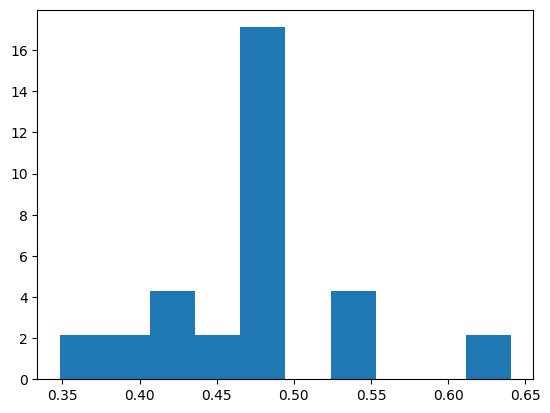

In [13]:
x = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение.

**Гипотеза**: \\
Нулевая гипотеза (H0): Мышам безразлично, в какой комнате проводить время, что означает, что медиана доли времени, проведённого в комнате с зеркалом, равна 0.5. \\
Альтернативная гипотеза (H1): Мыши предпочитают проводить больше или меньше времени в комнате с зеркалом, чем в комнате без зеркала, что означает отклонение медианы доли времени от 0.5. \\
Для проверки гипотезы применим тест Вилкоксона к данным, где будем сравнивать долю времени, проведённого мышами в комнате с зеркалом, с теоретическим значением 0.5.  \\
Критерии теста:
Непараметрический тест: Тест Вилкоксона используется для проверки разницы между медианами двух связанных выборок. Он не требует нормальности данных и является альтернативой парному t-тесту для ненормально распределённых данных.
Использование для связанных выборок: Тест применяется, когда данные взяты из одного и того же набора объектов, в данном случае — измерения доли времени, проведённого мышами в комнате с зеркалом.
Медианное значение: Тест проверяет, существует ли статистически значимая разница между медианами двух распределений.

In [14]:
w, pvalue_2 = sts.wilcoxon(x - 0.5, alternative='two-sided')

print(f"T-статистика: {w}")
print(f"P-значение: {pvalue_2}")

# Интерпретация результата
alpha = 0.05
if pvalue_2 < alpha:
    print("Мы отвергаем нулевую гипотезу: мыши проявляют предпочтение в отношении зеркала.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу: мышам безразлично, проводить время в комнате с зеркалом или без него.")

T-статистика: 35.0
P-значение: 0.09344482421875
Мы не можем отвергнуть нулевую гипотезу: мышам безразлично, проводить время в комнате с зеркалом или без него.


**Вывод:** \\
Поскольку p-значение (0.093) больше уровня значимости (0.05), мы не отвергаем нулевую гипотезу. Это означает, что нет статистически значимых доказательств отклонения медианы доли времени, проведённого мышами в комнате с зеркалом, от 0.5. \\
Таким образом, экспериментальные данные не предоставляют достаточных оснований для утверждения, что мыши проявляют предпочтение относительно комнаты с зеркалом.

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение.

**Гипотеза**: \\
Нулевая гипотеза (H0): Мышам безразлично, в какой комнате проводить время, что означает, что средняя доля времени, проведённого в комнате с зеркалом, равна 0.5. \\
Альтернативная гипотеза (H1): Мыши проявляют предпочтение, проводя больше или меньше времени в комнате с зеркалом, чем в комнате без зеркала (средняя доля времени отклоняется от 0.5). \\
Основные особенности асимптотического z-теста; \\
Параметрический тест: z-тест используется для проверки гипотезы о равенстве среднего значения выборки с известным средним в популяции, если известно стандартное отклонение или его оценка.
Асимптотический характер: Тест основывается на нормальном распределении, которое становится хорошим приближением распределения выборочного среднего для больших выборок, благодаря центральной предельной теореме.
Тестирование средних: Применяется для проверки равенства среднего значения выборки с известным или гипотетическим значением в популяции.

In [15]:
from statsmodels.stats.weightstats import ztest, zconfint

z_stat, pvalue_3 = ztest(x, value=0.5)
print(z_stat)
print(pvalue_3)

if pvalue_3 < 0.05:
    print("Отвергаем нулевую гипотезу: мышам не безразлично, в какой комнате проводить время.")
else:
    print("Не отвергаем нулевую гипотезу: мышам безразлично, в какой комнате проводить время.")

-1.4961782502486842
0.13460721078205806
Не отвергаем нулевую гипотезу: мышам безразлично, в какой комнате проводить время.


**Вывод**: \\
Поскольку p-значение больше 0.05, мы не отвергаем нулевую гипотезу. Это означает, что у нас нет достаточно оснований утверждать, что мышам не безразлично, в какой комнате проводить время. Следовательно, можно заключить, что мышам действительно безразлично, в какой комнате проводить время.

In [16]:
# проверка того, что задание решено верно
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

**Вывод:** \\
Тест Вилкоксона не показывает значимого отклонения, так как учитывает как направления, так и величины разностей -> более мощный, чем критерий знаков. \\
Асимптотический z-тест не показывает значимого отклонения, он предполагает нормальное распределение данных и может быть мощным, если это предположение выполняется.  \\
-> Различия в 𝑝-значениях между тестами объясняются различиями в их методологии и предположениях о данных.

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)


## Задание 4 (транзакции клиентов)

Для увеличения конверсии мы хотим переименовать кнопку "Subscribe now!" на сайте в "Keep me updated".

Данные о результатах A/B-теста находятся в таблице `a_b_test`. В колонке `transaction` для каждого клиента указано, кликнул он по кнопке или нет.

Оцените эффект от изменения названия кнопки.



In [17]:
a_b_test = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/ClientsTransactions.csv")

a_b_test.head()

,group,transaction
0,B,0
1,B,0
2,A,0
3,B,0
4,A,0


Создайте summary_table. Код должен иметь структуру (названия колонок, строк и их количество) как на таблице со скриншота.

In [18]:
summary_table = a_b_test.pivot_table(index='group', columns='transaction', aggfunc='size', fill_value=0)
summary_table.columns = ['No Click', 'Click']
summary_table['Total'] = summary_table['No Click'] + summary_table['Click']
summary_table['Conversion Rate'] = summary_table['Click'] / summary_table['Total']
summary_table

,No Click,Click,Total,Conversion Rate
group,,,,
A,2004,56,2060,0.027184
B,2264,74,2338,0.031651


Отфильтруйте исходную таблицу, оставив в ней только клиентов группы А - результат назовите A_group. Создайте аналогичный объект B_group по группе B.

Нарисуйте гистограмму, отображающую на одном рисунке количество успешных транзакций (кликов по кнопке) для каждой группы.

In [19]:
A_group = a_b_test[a_b_test['group'] == 'A']
B_group = a_b_test[a_b_test['group'] == 'B']

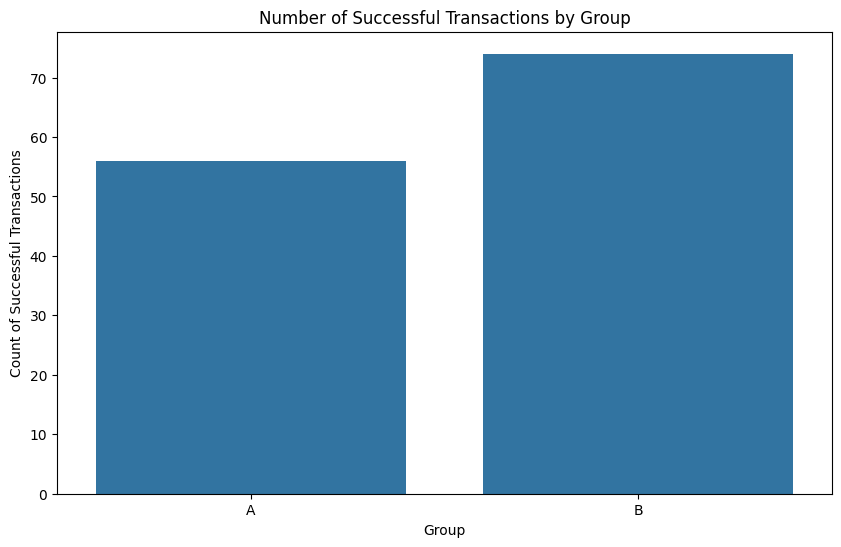

In [20]:
successful_transactions = a_b_test[a_b_test['transaction'] == 1]
plt.figure(figsize=(10, 6))
sns.countplot(data=successful_transactions, x='group')
plt.title('Number of Successful Transactions by Group')
plt.xlabel('Group')
plt.ylabel('Count of Successful Transactions')
plt.show()

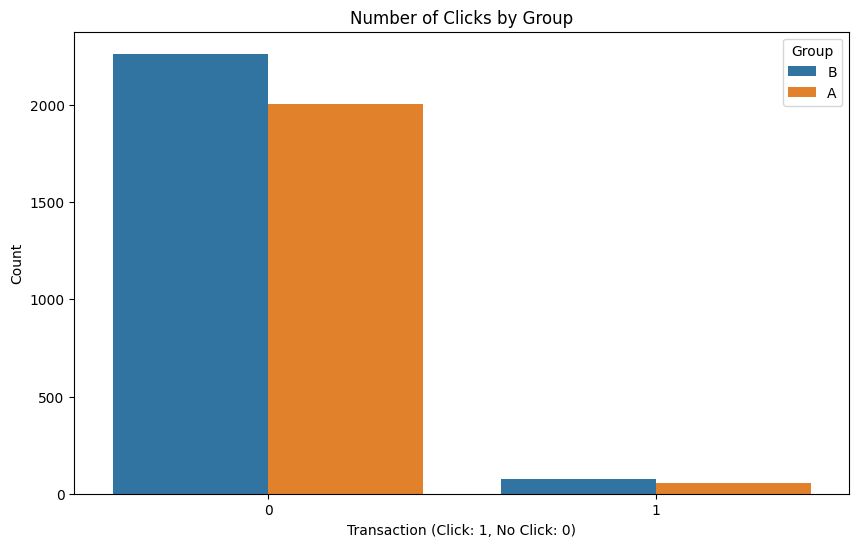

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=a_b_test, x='transaction', hue='group')
plt.title('Number of Clicks by Group')
plt.xlabel('Transaction (Click: 1, No Click: 0)')
plt.ylabel('Count')
plt.legend(title='Group')
plt.show()

**Гипотеза**: \\
Нулевая гипотеза (H0): Изменение названия кнопки не влияет на конверсию (процент кликов одинаков для обеих групп). \\
Альтернативная гипотеза (H1): Изменение названия кнопки влияет на конверсию (процент кликов отличается для двух групп). \\
Поскольку у нас есть две группы и бинарные данные (клик или не клик), мы будем использовать критерий хи-квадрат для проверки независимости. Этот тест подходит для сравнения частотных данных между двумя или более независимыми группами. У на есть фактор групп и фактор 1 и 0, мы проверяем их независимость.

In [22]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(a_b_test['group'], a_b_test['transaction'])
print(contingency_table)

# Тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

# Шаг 4: Выводы
if p < 0.05:
    print("Отвергаем нулевую гипотезу: изменение названия кнопки влияет на конверсию.")
else:
    print("Не отвергаем нулевую гипотезу: изменение названия кнопки не влияет на конверсию.")

transaction     0   1
group                
A            2004  56
B            2264  74
Chi2: 0.6138683122303483, p-value: 0.43333502878900587
Не отвергаем нулевую гипотезу: изменение названия кнопки не влияет на конверсию.


**Вывод**:
Для проверки гипотезы мы использовали уровень значимости
𝛼=0.05. Мы не отвергли нулевую гипотезу, тк p > 0.05. Cледовательно, текущее изменение текста кнопки не оказывает значительного влияния на конверсию пользователей, и, следовательно, решение о смене текста кнопки не имеет статистически значимого эффекта. \\